In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
file_to_read = open("/content/drive/MyDrive/NLP_project/X_train_final_anupam", "rb")
X_train = pickle.load(file_to_read)
file_to_read = open("/content/drive/MyDrive/NLP_project/y_train_final_anupam", "rb")
y_train = pickle.load(file_to_read)

In [3]:
X_train.shape

(109770, 60, 100)

In [4]:
y_train.shape

(109770, 1, 3)

In [5]:
import tensorflow as tf
import keras 
title_input = keras.Input(
    shape=(60,100), name="title"
)
y1=keras.layers.Conv1D(40,2,activation='relu',input_shape=(60,100))(title_input)
#y2=keras.layers.Conv1D(32,2,activation='relu',input_shape=(100,100))(title_input)
y3=keras.layers.Conv1D(40,3,activation='relu',input_shape=(60,100))(title_input)
#y4=keras.layers.Conv1D(32,3,activation='relu',input_shape=(60,100))(title_input)
y5=keras.layers.Conv1D(40,4,activation='relu',input_shape=(60,100))(title_input)
y6=keras.layers.Conv1D(40,5,activation='relu',input_shape=(60,100))(title_input)

m1=tf.keras.layers.MaxPooling1D(pool_size=59,strides=1)(y1)
#m2=tf.keras.layers.MaxPooling1D(pool_size=59,strides=1)(y2)
m3=tf.keras.layers.MaxPooling1D(pool_size=58,strides=1)(y3)
#m4=tf.keras.layers.MaxPooling1D(pool_size=58,strides=1)(y4)
m5=tf.keras.layers.MaxPooling1D(pool_size=57,strides=1)(y5)
m6=tf.keras.layers.MaxPooling1D(pool_size=56,strides=1)(y6)

#concanate = tf.keras.layers.concatenate([m1,m2,m3,m4,m5,m6])
concanate = tf.keras.layers.concatenate([m1,m3,m5,m6])
den_lay1 = tf.keras.layers.Dense(256, name="MLP1")(concanate)

den_lay2 = tf.keras.layers.Dense(128, name="MLP2")(den_lay1)

den_lay3 = tf.keras.layers.Dense(64, name="MLP3")(den_lay2)

den_lay4 = tf.keras.layers.Dense(32, name="MLP4")(den_lay3)

den_lay5 = tf.keras.layers.Dense(16, name="MLP5")(den_lay4)

op_lay = tf.keras.layers.Dense(3, activation='softmax',name="priority")(den_lay5)

model = keras.Model(
    inputs=[title_input],
    outputs=[op_lay],
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
model.fit(X_train,y_train,validation_split=0.23,epochs=22)

Epoch 1/22
2642/2642 [==============================] - 861s 325ms/step - loss: 0.8859 - accuracy: 0.5862 - val_loss: 0.7962 - val_accuracy: 0.6391
Epoch 2/22
2642/2642 [==============================] - 613s 232ms/step - loss: 0.7781 - accuracy: 0.6487 - val_loss: 0.7802 - val_accuracy: 0.6481
Epoch 3/22
2642/2642 [==============================] - 476s 180ms/step - loss: 0.7360 - accuracy: 0.6744 - val_loss: 0.7712 - val_accuracy: 0.6536
Epoch 4/22
2642/2642 [==============================] - 728s 275ms/step - loss: 0.6910 - accuracy: 0.6965 - val_loss: 0.7876 - val_accuracy: 0.6518
Epoch 5/22
2642/2642 [==============================] - 497s 188ms/step - loss: 0.6543 - accuracy: 0.7147 - val_loss: 0.8066 - val_accuracy: 0.6503
Epoch 6/22
2642/2642 [==============================] - 701s 265ms/step - loss: 0.6166 - accuracy: 0.7345 - val_loss: 0.8494 - val_accuracy: 0.6481
Epoch 7/22
2642/2642 [==============================] - 720s 273ms/step - loss: 0.5860 - accuracy: 0.7474 - val_

KeyboardInterrupt: ignored

In [5]:
import tensorflow as tf
import keras 
title_input = keras.Input(
    shape=(60,100), name="title"
)
y1=keras.layers.Conv1D(40,2,activation='relu',input_shape=(60,100))(title_input)
#y2=keras.layers.Conv1D(32,2,activation='relu',input_shape=(100,100))(title_input)
y3=keras.layers.Conv1D(40,3,activation='relu',input_shape=(60,100))(title_input)
#y4=keras.layers.Conv1D(32,3,activation='relu',input_shape=(60,100))(title_input)
y5=keras.layers.Conv1D(40,4,activation='relu',input_shape=(60,100))(title_input)
y6=keras.layers.Conv1D(40,5,activation='relu',input_shape=(60,100))(title_input)

m1=tf.keras.layers.MaxPooling1D(pool_size=59,strides=1)(y1)
#m2=tf.keras.layers.MaxPooling1D(pool_size=59,strides=1)(y2)
m3=tf.keras.layers.MaxPooling1D(pool_size=58,strides=1)(y3)
#m4=tf.keras.layers.MaxPooling1D(pool_size=58,strides=1)(y4)
m5=tf.keras.layers.MaxPooling1D(pool_size=57,strides=1)(y5)
m6=tf.keras.layers.MaxPooling1D(pool_size=56,strides=1)(y6)

#concanate = tf.keras.layers.concatenate([m1,m2,m3,m4,m5,m6])
concanate = tf.keras.layers.concatenate([m1,m3,m5,m6])
#den_lay1 = tf.keras.layers.Dense(256, name="MLP1")(concanate)

#den_lay2 = tf.keras.layers.Dense(128, name="MLP2")(den_lay1)

den_lay3 = tf.keras.layers.Dense(64, name="MLP3")(concanate)

den_lay4 = tf.keras.layers.Dense(32, name="MLP4")(den_lay3)

den_lay5 = tf.keras.layers.Dense(16, name="MLP5")(den_lay4)

op_lay = tf.keras.layers.Dense(3, activation='softmax',name="priority")(den_lay5)

model = keras.Model(
    inputs=[title_input],
    outputs=[op_lay],
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
model.fit(X_train,y_train,validation_split=0.25,epochs=22)

Epoch 1/22
2573/2573 [==============================] - 53s 17ms/step - loss: 0.8684 - accuracy: 0.5955 - val_loss: 0.7901 - val_accuracy: 0.6428
Epoch 2/22
2573/2573 [==============================] - 41s 16ms/step - loss: 0.7685 - accuracy: 0.6547 - val_loss: 0.7885 - val_accuracy: 0.6494
Epoch 3/22
2573/2573 [==============================] - 41s 16ms/step - loss: 0.7225 - accuracy: 0.6827 - val_loss: 0.7657 - val_accuracy: 0.6565
Epoch 4/22
2573/2573 [==============================] - 41s 16ms/step - loss: 0.6780 - accuracy: 0.7054 - val_loss: 0.7865 - val_accuracy: 0.6532
Epoch 5/22
2573/2573 [==============================] - 41s 16ms/step - loss: 0.6425 - accuracy: 0.7222 - val_loss: 0.7896 - val_accuracy: 0.6535
Epoch 6/22
2573/2573 [==============================] - 40s 16ms/step - loss: 0.6044 - accuracy: 0.7397 - val_loss: 0.8024 - val_accuracy: 0.6444
Epoch 7/22
2573/2573 [==============================] - 40s 16ms/step - loss: 0.5732 - accuracy: 0.7557 - val_loss: 0.8467 -

In [8]:
from keras.utils.vis_utils import plot_model

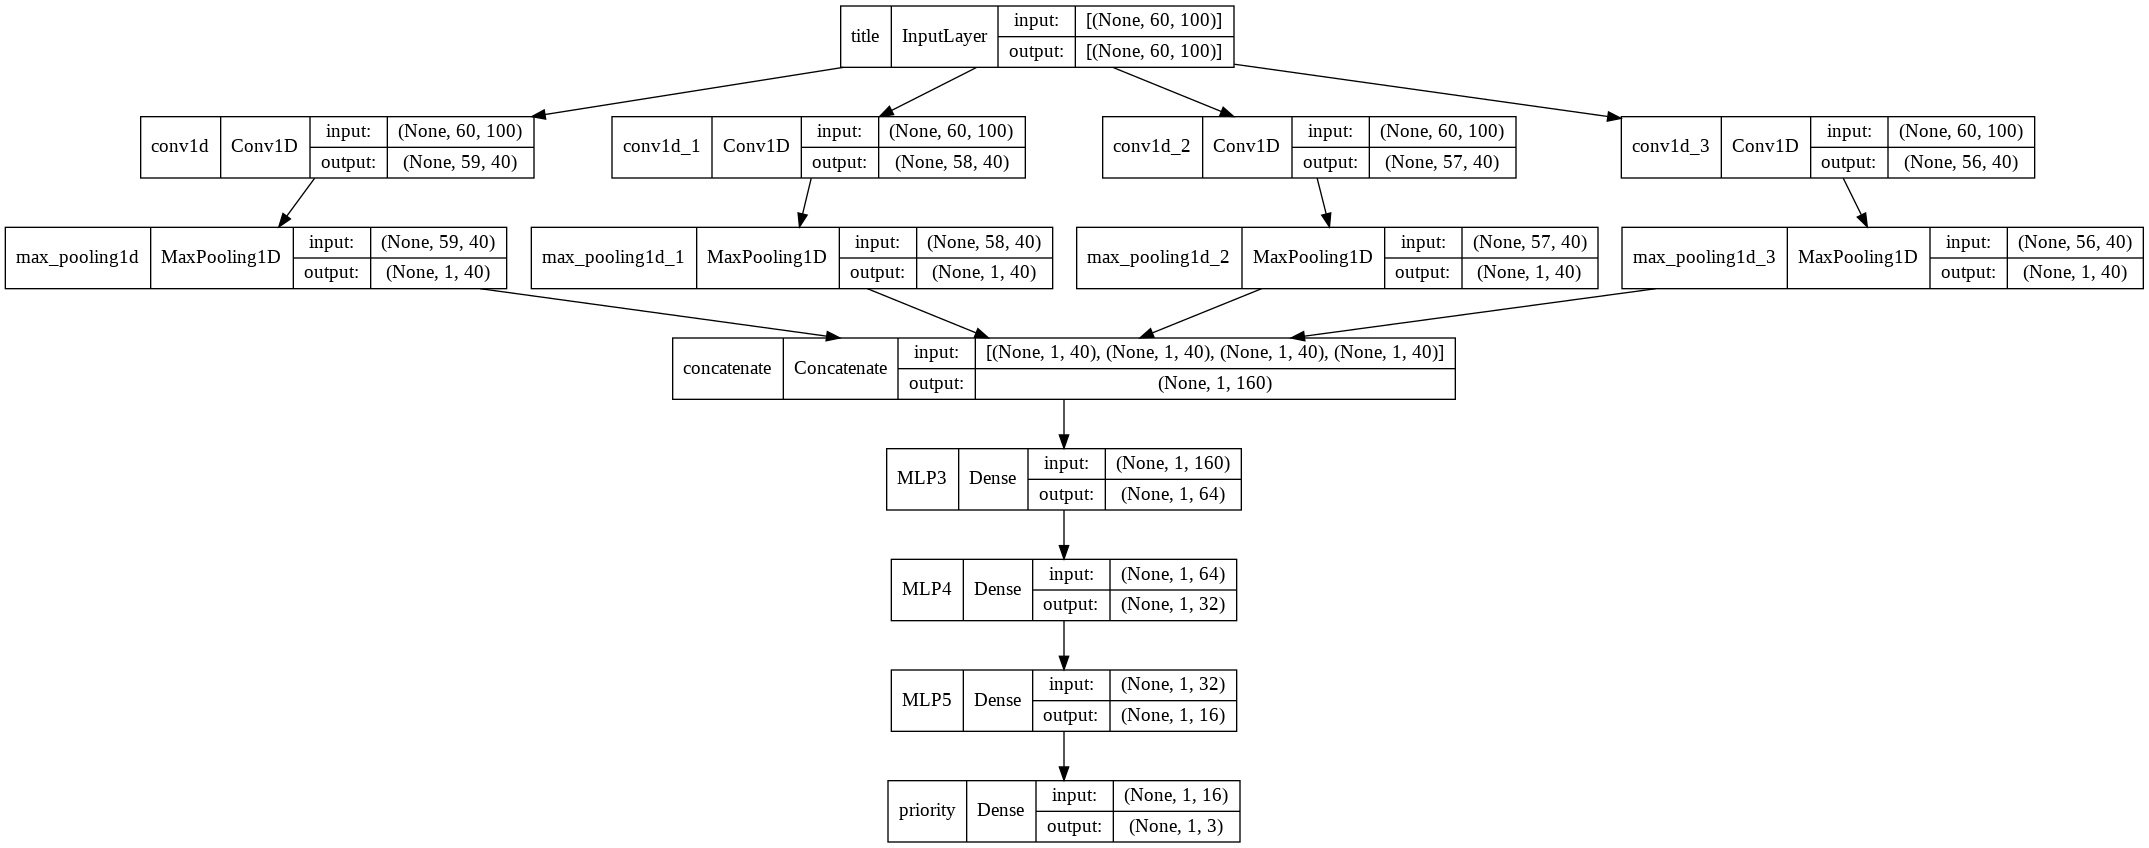

In [9]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import matplotlib